Настало время провести свой первый A/B тест.

## Задание
Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).<br>
<br>У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. <br>
<br>Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. <br>
<br>Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.
    
#### Описание данных
* order_id - id заказа
* delivery_time - время доставки в минутах
* district - район доставки
* experiment_group - экспериментальная группа

<b>Cформулируем гипотезы для проверки:</b>
* Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
* Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

In [1]:
# Import libraries and data
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
sns.set(
     font_scale=2,
     style="whitegrid",
     rc={'figure.figsize':(20,7)}
         )

In [3]:
df = pd.read_csv('experiment_lesson_4.csv')
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [4]:
# Divide the data by experiment_group into test and control groups.

In [5]:
control_df = df.query('experiment_group == "control"')
control_df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
10087,2708,23.0,Central,control
10088,3918,45.0,Central,control
10089,9544,41.0,Suburb,control
10090,1101,38.0,Central,control


In [6]:
test_df = df.query('experiment_group == "test"')
test_df

,order_id,delivery_time,district,experiment_group
10092,12494,38.0,Purlieus,test
10093,12136,31.0,Purlieus,test
10094,11987,39.0,Purlieus,test
10095,12848,29.0,Central,test
10096,13166,31.0,Purlieus,test
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [7]:
# Visualize the distribution plot of the delivery time with division by districts.

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

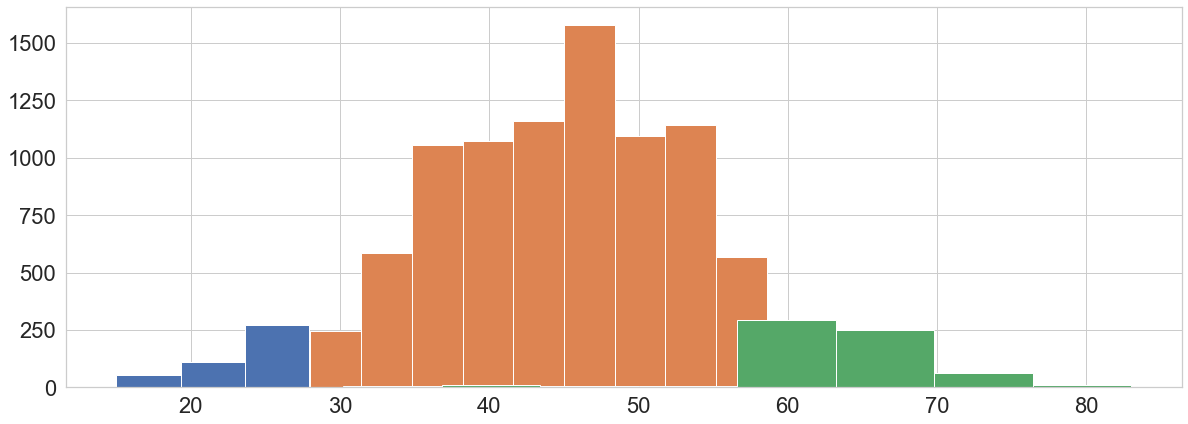

In [8]:
control_df.groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

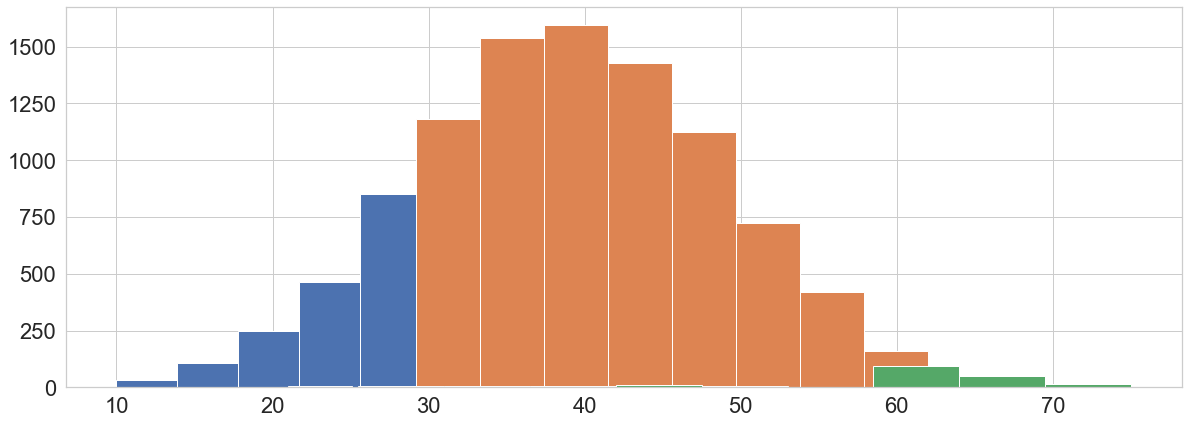

In [9]:
test_df.groupby('district').delivery_time.hist()

In [10]:
# Let's look at how much the number of observations in the test and control differs in absolute value.
abs(control_df.shape[0] - test_df.shape[0])

12

In [11]:
# Sample each of the groups, check them for normality using the Shapiro-Wilk test,
# and calculate the standard deviations for each of the groups.

In [12]:
test_sample = test_df['delivery_time'].sample(1000, random_state=17)
test_sample

17877    37.0
18499    39.0
16476    48.0
14602    30.0
16719    25.0
         ... 
12410    40.0
18882    47.0
15944    47.0
14618    41.0
18816    36.0
Name: delivery_time, Length: 1000, dtype: float64

In [13]:
control_sample = control_df['delivery_time'].sample(1000, random_state=17)
control_sample

7144    42.0
6231    42.0
6902    41.0
7032    54.0
2009    44.0
        ... 
752     54.0
3754    63.0
5420    64.0
8119    49.0
4804    45.0
Name: delivery_time, Length: 1000, dtype: float64

In [14]:
stats.shapiro(test_sample)

ShapiroResult(statistic=0.9975475668907166, pvalue=0.14005419611930847)

In [15]:
stats.shapiro(control_sample)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [16]:
test_df['delivery_time'].std()

9.883308351129031

In [17]:
control_df['delivery_time'].std()

9.990016960247171

Tests show that the values in the test and control groups are normally distributed.<br>The standard deviation of the delivery time in the test is 9.88. The standard deviation of delivery time in the control is 9.99.

In [18]:
stats.ttest_ind(test_df['delivery_time'], control_df['delivery_time'])

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

To compare the means in these experimental groups, we used the Student's T-test. The statistics in the test is -43, p-value <= 0.05.

In [19]:
test_mean = test_df['delivery_time'].mean()
test_mean

39.04681314330958

In [20]:
control_mean = control_df['delivery_time'].mean()
control_mean

45.065101070154576

In [21]:
# Let's calculate how many percent the average delivery time in the test group
# has changed compared to the control group.

In [22]:
round((test_mean - control_mean) / control_mean * 100, 2)

-13.35

<b>Conclusion:</b> release the new algorithm for everyone, since the average delivery time has changed statistically significantly. The average delivery time in the test is less than in the control.